In [1]:
import pandas as pd

In [2]:
from google.colab import files

In [3]:
import io

# Importing data
Data Source: https://www.kaggle.com/datasets/thedevastator/fast-food-restaurants-in-the-united-states

In [58]:
uploaded = files.upload()
df1 = pd.read_csv(io.BytesIO(uploaded['FastFoodRestaurants.csv']))

Saving FastFoodRestaurants.csv to FastFoodRestaurants (2).csv


In [60]:
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['Datafiniti_Fast_Food_Restaurants.csv']))

Saving Datafiniti_Fast_Food_Restaurants.csv to Datafiniti_Fast_Food_Restaurants (2).csv


In [61]:
uploaded = files.upload()
df3 = pd.read_csv(io.BytesIO(uploaded['Datafiniti_Fast_Food_Restaurants_Jun19.csv']))

Saving Datafiniti_Fast_Food_Restaurants_Jun19.csv to Datafiniti_Fast_Food_Restaurants_Jun19 (2).csv


In [75]:
big_df = pd.concat([df1[["name", "address", "city", "province", "latitude", "longitude"]], df2[["name", "address", "city", "province", "latitude", "longitude"]], df3[["name", "address", "city", "province", "latitude", "longitude"]]], ignore_index=True)

In [76]:
big_df.head()

,name,address,city,province,latitude,longitude
0,McDonald's,324 Main St,Massena,NY,44.92130,-74.89021
1,Wendy's,530 Clinton Ave,Washington Court House,OH,39.53255,-83.44526
2,Frisch's Big Boy,408 Market Square Dr,Maysville,KY,38.62736,-83.79141
3,McDonald's,6098 State Highway 37,Massena,NY,44.95008,-74.84553
4,OMG! Rotisserie,139 Columbus Rd,Athens,OH,39.35155,-82.09728


# Data Cleaning

## Dropping duplicates

In [80]:
df = big_df.loc[~big_df.duplicated()]

## Filter non US-based restaurants

In [83]:
fig = px.scatter_geo(df,lat='latitude',lon='longitude', hover_name="address")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

There are some restaurants outside the US included. We will delete them and only look at the ones inside the US.

In [89]:
min_lat = 19
max_lat = 62
min_lon = -170
max_lon = -60

In [90]:
us_df = df.loc[(df["latitude"] > min_lat) & (df["latitude"] < max_lat) & (df["longitude"] > min_lon) & (df["longitude"] < max_lon)]

In [91]:
us_df.shape

(28732, 6)

In [94]:
fig = px.scatter_geo(us_df,lat='latitude',lon='longitude', hover_name="address")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

For reasons of simplicity, we are excluding three restaurants in Mexico manually.

In [98]:
us_df = us_df.loc[(us_df["address"] != "Blvd El Bote 202") & (us_df["address"] != "Divisin Del Norte 2855") & (us_df["address"] != "Prol Zaragoza 80")] 

In [99]:
fig = px.scatter_geo(us_df,lat='latitude',lon='longitude', hover_name="address")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

## Match chains with different spellings

In [110]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [113]:
np.sort(us_df["name"].unique())

array(["1 Frisch's Big Boy Restaurant", '1 Gyro Shoppe',
       '143 Street Tacos', '2 Bits Cafe', '31st Avenue Gyro',
       "40 Frisch's Big Boy Restaurant", '5 Star Abq', '5th Street Diner',
       '7-11', '7-Eleven', "90 Frisch's Big Boy Restaurant",
       '90 Miles Cuban Cafe', '900 Degrees Pizza', '919 Dine',
       'A & W Family Restaurant', 'A W Restaurant', 'A&W',
       'A&W All American Food', 'A&W All-American Food',
       'A&W All-American Foods', 'A&W Restaurant',
       'A&W/Long John Silvers', 'A&w', 'A&w Restaurant',
       "A's Ace Burgers", 'ABC Chinese Restaurant',
       "AJ's Hotdogs & Gyros", 'AW', 'AW All-American Food',
       'AW Restaurant', 'AW Restaurants', 'AWRestaurants',
       "Abby's Legendary Pizza", 'Abbys Restaurant Bar', 'Abruzzi Pizza',
       'Acai Alaska', 'Acropolis Gyro Palace', "Adalberto's Mexican Food",
       'Adams Enterprises', 'Adobe Cantina Salsa', 'Afternoon Deli',
       'Agate Alley Bistro', "Al's Burger Shack",
       "Al's Burge

A lot of chains are written slightly different and therefore have different names. We will make a few adjustments in order to be able to better match those restaurants

In [114]:
us_df["name"] = us_df["name"].str.lower() # making everything lowercase

In [119]:
us_df["name"] = us_df["name"].str.replace('\W+', '') # removing special characters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [116]:
us_df["name"] = us_df["name"].str.replace('and', '') # removing and

In [117]:
us_df["name"] = us_df["name"].str.replace(' ', '') # removing blank spaces

There are still duplicates in the data. However, we can work with the data now and come to meaningful results.

In [121]:
us_df.head()

,name,address,city,province,latitude,longitude
0,mcdonalds,324 Main St,Massena,NY,44.92130,-74.89021
1,wendys,530 Clinton Ave,Washington Court House,OH,39.53255,-83.44526
2,frischsbigboy,408 Market Square Dr,Maysville,KY,38.62736,-83.79141
3,mcdonalds,6098 State Highway 37,Massena,NY,44.95008,-74.84553
4,omgrotisserie,139 Columbus Rd,Athens,OH,39.35155,-82.09728


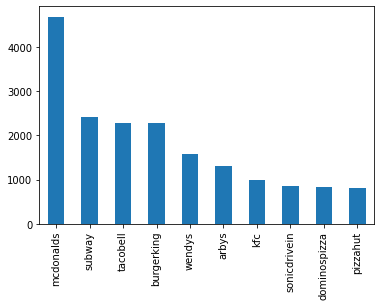

In [131]:
us_df["name"].value_counts()[:10].plot(kind="bar")

# Importing city population data 
Data Source: https://www.census.gov/data/tables/time-series/demo/popest/2010s-total-cities-and-towns.html

In [15]:
uploaded = files.upload()
cities_df = pd.read_excel(io.BytesIO(uploaded['us_cities_population.xlsx']))

Saving us_cities_population.xlsx to us_cities_population (1).xlsx


In [16]:
cities_df.head()

,table with row headers in column B and column headers in rows 3 through 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rank,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,1,"New York city, New York",8175133,8175031,8190209,8272948.0,8346693.0,8396091.0,8433806.0,8463049.0,8469153.0,8437478.0,8390081.0,8336817.0
4,2,"Los Angeles city, California",3792621,3793139,3795512,3820876.0,3851202.0,3881622.0,3909901.0,3938568.0,3963226.0,3975788.0,3977596.0,3979576.0


In [24]:
cities_df.columns = ["index", "city"] + list(cities_df.iloc[2][2:])

In [25]:
cities_df.head()

,index,city,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rank,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,1,"New York city, New York",8175133,8175031,8190209,8272948.0,8346693.0,8396091.0,8433806.0,8463049.0,8469153.0,8437478.0,8390081.0,8336817.0
4,2,"Los Angeles city, California",3792621,3793139,3795512,3820876.0,3851202.0,3881622.0,3909901.0,3938568.0,3963226.0,3975788.0,3977596.0,3979576.0


In [37]:
cities_df = cities_df[["city", 2019]].iloc[3:791]

In [38]:
cities_df.head()

,city,2019.0
3,"New York city, New York",8336817.0
4,"Los Angeles city, California",3979576.0
5,"Chicago city, Illinois",2693976.0
6,"Houston city, Texas",2320268.0
7,"Phoenix city, Arizona",1680992.0


Now we have population data for all 788 cities with more than 50,000 residents in the United States. However, the city is in the form of city, state. In our fast food data there are two columns for city and state (abbreviated). We will parse the city column in our population data to get the same form that we have in the fast food data.

In [41]:
cities_df[["city_name", "state"]] = cities_df["city"].str.split(",", expand=True) # creating two new columns for city and state by splitting the old column at the comma

In [46]:
cities_df["city_name"] = cities_df["city_name"].str.rsplit(" ", 1).str[0] # removing the "city" or "village" at the end of the city name

In [52]:
cities_df["state"] = cities_df["state"].str.strip() # removing trailing spaces

In [47]:
cities_df.head()

,city,2019.0,city_name,state
3,"New York city, New York",8336817.0,New York,New York
4,"Los Angeles city, California",3979576.0,Los Angeles,California
5,"Chicago city, Illinois",2693976.0,Chicago,Illinois
6,"Houston city, Texas",2320268.0,Houston,Texas
7,"Phoenix city, Arizona",1680992.0,Phoenix,Arizona


In [48]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

# credit: https://gist.github.com/rogerallen/1583593

In [54]:
cities_df["state"] = cities_df["state"].apply(lambda x: us_state_to_abbrev[x])

In [59]:
cities_df = cities_df.drop(columns=["city"])

In [60]:
cities_df.head()

,2019.0,city_name,state
3,8336817.0,New York,NY
4,3979576.0,Los Angeles,CA
5,2693976.0,Chicago,IL
6,2320268.0,Houston,TX
7,1680992.0,Phoenix,AZ


In [83]:
cities_df.columns = ["population", "city", "province"]

In [63]:
cities_df.head()

,population,city,state
3,8336817.0,New York,NY
4,3979576.0,Los Angeles,CA
5,2693976.0,Chicago,IL
6,2320268.0,Houston,TX
7,1680992.0,Phoenix,AZ


In [66]:
cities_df.shape

(788, 3)

Let's see how many cities of the population data appear in the fast food data:

In [75]:
fast_food_cities = us_df.groupby(["city", "province"])["address"].count().to_frame().reset_index()

In [91]:
fast_food_cities.rename(columns={"address": "# restaurants"}, inplace=True)

In [86]:
pd.merge(cities_df[["city", "province"]], fast_food_cities[["city", "province"]], how="inner").shape[0]

697

697 cities of the 788 cities from our population data appear in the fast food data. We can work with that. Let's join both dataframes to be able to compare population and number of fast food restaurants

In [93]:
merged_city_data = pd.merge(cities_df, fast_food_cities, left_on=["city", "province"], right_on=["city", "province"], how="inner")

In [8]:
merged_city_data["restaurants per capita"] = merged_city_data["# restaurants"] / merged_city_data["population"]

In [9]:
merged_city_data.head()

,population,city,province,# restaurants,restaurants per capita
0,8336817.0,New York,NY,72,0.000009
1,3979576.0,Los Angeles,CA,112,0.000028
2,2693976.0,Chicago,IL,137,0.000051
3,2320268.0,Houston,TX,189,0.000081
4,1680992.0,Phoenix,AZ,137,0.000081


In [10]:
merged_city_data["population per restaurant"] = merged_city_data["population"] / merged_city_data["# restaurants"]

In [11]:
merged_city_data.head()

,population,city,province,# restaurants,restaurants per capita,population per restaurant
0,8336817.0,New York,NY,72,0.000009,115789.125000
1,3979576.0,Los Angeles,CA,112,0.000028,35531.928571
2,2693976.0,Chicago,IL,137,0.000051,19664.058394
3,2320268.0,Houston,TX,189,0.000081,12276.550265
4,1680992.0,Phoenix,AZ,137,0.000081,12270.014599


In [12]:
merged_city_data["restaurants per 10k people"] = merged_city_data["# restaurants"] / (merged_city_data["population"]/10000)

In [13]:
merged_city_data.head()

,population,city,province,# restaurants,restaurants per capita,population per restaurant,restaurants per 10k people
0,8336817.0,New York,NY,72,0.000009,115789.125000,0.086364
1,3979576.0,Los Angeles,CA,112,0.000028,35531.928571,0.281437
2,2693976.0,Chicago,IL,137,0.000051,19664.058394,0.508542
3,2320268.0,Houston,TX,189,0.000081,12276.550265,0.814561
4,1680992.0,Phoenix,AZ,137,0.000081,12270.014599,0.814995


In [15]:
merged_city_data["city, state"] = merged_city_data["city"] + ", " + merged_city_data["province"]

In [16]:
merged_city_data.head()

,population,city,province,# restaurants,restaurants per capita,population per restaurant,restaurants per 10k people,"city, state"
0,8336817.0,New York,NY,72,0.000009,115789.125000,0.086364,"New York, NY"
1,3979576.0,Los Angeles,CA,112,0.000028,35531.928571,0.281437,"Los Angeles, CA"
2,2693976.0,Chicago,IL,137,0.000051,19664.058394,0.508542,"Chicago, IL"
3,2320268.0,Houston,TX,189,0.000081,12276.550265,0.814561,"Houston, TX"
4,1680992.0,Phoenix,AZ,137,0.000081,12270.014599,0.814995,"Phoenix, AZ"
